In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [5]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(iris_dataset['DESCR'][:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


In [10]:
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
type(iris_dataset['data'])

numpy.ndarray

In [14]:
iris_dataset['data'].shape

(150, 4)

In [18]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [20]:
iris_dataset['target']
#['setosa' 'versicolor' 'virginica']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [22]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [57]:
df=pd.DataFrame(X_train)
dft=pd.DataFrame(y_train,columns=['y'])
dff=pd.concat((df,dft),axis=1)

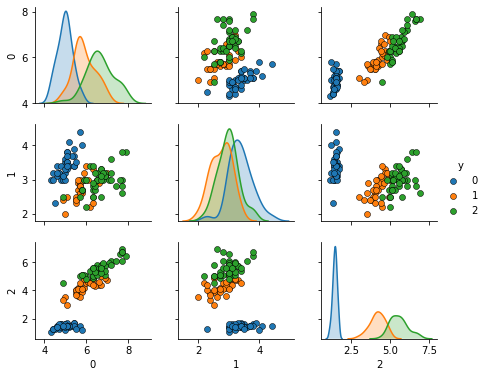

In [66]:
pp =sns.pairplot(dff,
                 vars=df.columns[:-1],
                 hue='y',
                height=1.8,
                aspect=1.2,
                plot_kws=dict(edgecolor='k',linewidth=0.5)
         )

In [67]:
#using KNN
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [70]:
#making predictions
X_new=np.array([[5,2.9,1,0.2]])
print(X_new.shape)

(1, 4)


In [72]:
predciton=knn.predict(X_new)

In [76]:
print("preicted target name ",iris_dataset['target_names'][predciton])

preicted target name  ['setosa']


In [77]:
#evaluating the model 
y_pred = knn.predict(X_test)


In [83]:
print("test set score :{:.2f}".format(np.mean(y_pred==y_test)))

test set score :0.97
